# Machine Learning and Statistics Project 2020
Author Angela Carpenter
- [power production dataset](https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv) from Ian McLoughlin Github

# Table of Contents
- Project Instructions / Overview
- Project plan
- About this Notebook
- Python Libraries
- Downloading and running the code
- Loading / Reading in the dataset
- Exploring the dataset
- Describing the dataset
- Summary Statistics
- Visualising the dataset using plots
- Summary and Conclusions
- References


## Project Instructions

In this project you must create a web service that uses machine learning to make pre- dictions based on the data set powerproduction available on Moodle. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. You must then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests. Your submission must be in the form of a git repository containing, at a minimum, the following items.
1. Jupyter notebook that trains a model using the data set. In the notebook you should explain your model and give an analysis of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.
To enhance your submission, you might consider developing and comparing more than one model. Rest assured, all the above concepts will be explored in lecture videos and other materials in the coming semester.

## Project Plan
I will add to this as I go from step to step.

- Explore the dataset first using descriptive statistics and some plots. I think the plots should come first.
- Look at the distribution of the data
- Check for missing value and outliers
- Looking at any visual relationship between wind speed and turbine power output.
- Look up some background information on wind turbines
- Clean dataset if necessary and redo statistics
- some machine learning!


In [1]:
# first importing the following libraries
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns

import csv

In [2]:
# save link to data and reference the link 
csv_url = 'https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv'
# read the csv data into a pandas dataframe
df = pd.read_csv(csv_url)
df
# write the dataframe to csv
df.to_csv('df.csv')

In [3]:
print("The first few rows in the dataset: \n\n", df.head(3))  # look at the top 5 rows of the DataFrame df
print('\n The final few rows in the dataset \n',df.tail(3)) # Look at the bottom 5 rows of the DataFrame

The first few rows in the dataset: 

    speed  power
0  0.000    0.0
1  0.125    0.0
2  0.150    0.0

 The final few rows in the dataset 
       speed  power
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0


In [4]:
print("The index of the DataFrame: ", df.index) # the index or row labels of the DataFrame
print("The dtypes in the dataframe are:", end='\n\n')

print(df.dtypes) # the data types attributes for each column in df

The index of the DataFrame:  RangeIndex(start=0, stop=500, step=1)
The dtypes in the dataframe are:

speed    float64
power    float64
dtype: object


### Null values
Here I check for null values. The `isnull` function returns no null values, yet there does appear to be null values when you look at the head and tail of the dataset so I need to investigate this further. 
I think my problem is that zero values are not Null values in Python. Null values are not zero in Python.(https://realpython.com/courses/python-none/)

https://stackoverflow.com/questions/50767452/check-if-dataframe-has-a-zero-element

In [5]:
print(df.isnull().sum())
df.notnull().sum()

speed    0
power    0
dtype: int64


speed    500
power    500
dtype: int64

In [6]:
df.isnull().values.any()

False

### Zero values
There are no null values in the dataset but there are some zero values. While there is only one zero value for the `speed` variable, there is a whopping 49 zero values for the `power` variable!
I looked at some plots below but will bring them up here.
Look at the distribution of values to see if the zero values are very unusual compared to the remaining 451 values for the power variable. I don't know much yet about wind turbines but I would have thought that there should be more smaller values for wind speed than power. For instance on a very dry still day, maybe there would be very little or even no speed at all in the wind? However the dataset has only 1 zero value for speed.

From the project description, the power variable represents wind turbine power output and the speed values are wind speed values.


In [7]:
#The proportion of zero values 
40/500

0.08

### Visualise the data
I will visualise the data here before looking at the summary statistics below.
The histogram of wind speed looks quite uniform when the default number of bins are used, spread across speeds from almost zero to 25. (I need to see what exactly is being measured here, how wind speed is represented).
The wind turbine power values seem to have a peak at very low values. This is not surprising given the large number of zero power values in this dataset. Almost 10% of the power values supplied are zero.  There is another peak around values of 95-100. Most of the remaining power values fall between 18 and 85.
A scatter plot can show if there is any visible relationship between the two variables. For 


### Visualise the relationship between wind speed and wind turbine power:
The scatter plot below a linear relationship between wind speed values and power for mid-range speed values only.
- When wind speed increases from very low levels, the power does not increase by much or at all. 
- The wind turbine power values does start to increase with the wind speed from wind speed values of about 5 to about 18/19. 
- From wind speeds of 20 onwards to about 25 the power values increase no further and seem to level off. 

Before I go and look up some info on wind turbines, I can make some guesses here.
- Perhaps at very low levels of wind speed, there is simply not enough speed to get any level of movement going and at a particular speed level the power maxes out, that there is simply no way for the turbine to generate more power no matter how fast the wind becomes after a certain level. 
- Maybe once the turbine is started up from zero it will take some time before any measurable units of power can be generated, and once a sufficient level of wind speed is reached, it takes little change in speed to keep the turbine going and small reductions in speed would have little impact on the turbine once it is in motion.
- Maybe some of the power being generated is actually being consumed by the turbine. Maybe after a while once the turbine gets going, it requires little energy to continue.

The goal of this project is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. I am wondering if the data values in this dataset represent measurements over a particular period(s) of time, that some datapoints represent represent earlier or later measurements over a certain timeframe. There is no downward trend in the scatter plot representing values of power output falling. Perhaps the turbines simply get switched off and power values drop immediately to zero.  Lower values of power could represent the time taken for the wind turbine to start up and get going. The linear trend in the middle range representing the increasing power as wind speeds increase and the peak and plateau representing the maximum values that the turbines are capable of generating. My next step is to do a little research into wind turbines.

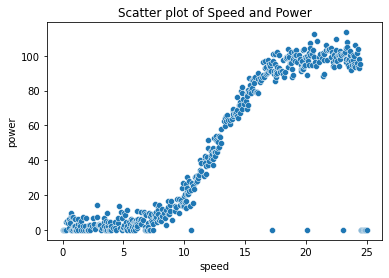

In [8]:
# create the plot
sns.scatterplot(x=df['speed'],y=df['power'])
# add title
plt.title("Scatter plot of Speed and Power");

In [9]:
# https://stackoverflow.com/questions/50767452/check-if-dataframe-has-a-zero-element
0 in df.values
df.isin([0]).any().any()

True

In [10]:
#https://stackoverflow.com/questions/29229600/counting-number-of-zeros-per-row-by-pandas-dataframe

df.isin([0]).sum()

speed     1
power    49
dtype: int64

In [11]:
df.sort_values(by='speed').head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [12]:
df.sort_values(by='speed', ascending=False).head()

,speed,power
499,25.000,0.0
498,24.950,0.0
497,24.875,0.0
496,24.850,0.0
495,24.775,0.0


In [13]:
df.sort_values(by='power', ascending=False).head()

,speed,power
461,23.273,113.556
416,20.646,112.362
447,22.497,109.932
420,20.871,108.485
464,23.348,108.167


In [14]:
df.sort_values(by='power').head()

,speed,power
0,0.000,0.0
111,5.806,0.0
110,5.781,0.0
105,5.556,0.0
89,4.880,0.0


In [15]:
df.sort_values(by='speed').head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


The [DataFrame.to_numpy()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy)function gives a NumPy representation of the underlying data. It converts the dataframe to a numpy array which may be useful here given that the data is all numerical types (floats64).

In [16]:
#df.to_numpy()

## Exploring the dataset using statistics

There are no categorical variables in this dataset.

### Quantitative variables
When looking at quantitative variables the characteristics of interest are the centre, spread, modality (the number of peaks in the pdf), the shape of the distribution and the outliers.
Pandas `describe` function generates statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution. (excluding NaN values)

In [17]:
# get summary statistics of the numerical values, 
df.describe() # get statistics summary of the

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


Much of this next part is some of the information on statistics that I had in my Tips dataset project. I will remove most of it but keep it here for now as a reference point.

#### Central Tendency statistics of the dataset

The **central tendency** or location of the data distribution is determined by the typical or middle values. The arithmetic mean is the sum of all the data values divided by the number of values. While the mean value is the average value in the dataset it may not be typical of the values in the dataset if there are very small or very large values in the dataset. The *median* is another measure of central tendancy - it is the middle value after all the values are put in an ordered list.
The mean and median are similar for symmetric distributions whereas for unimodal skewed distributions the mean will be more in the direction of the long tail of the distribution. 
The median can be considered a more typical value in the dataset or closer to some of the typical values and is also considered [robust](https://en.wikipedia.org/wiki/Robust_statistics) which means that removing some of the data will not tend to change the value of the median. A few extreme values will not affect the median as they would affect the mean. 
In this dataset the mean and median wind speed values are similar at approx 12.5 to 12.6.
The median power value is just over 41 compared to the mean power value of 48.
As we saw above, there are many zero values for power in the dataset. At least 10% of the power values are zero and probably for valid reasons.



In [18]:
print("The mean speed value is %.3f" %df['speed'].mean(),"while the median speed value  is %.3f" %df['speed'].quantile(q=0.5))
print("The mean power value is %.3f" %df['power'].mean(),"while the median power value  is %.3f" %df['power'].quantile(q=0.5))

The mean speed value is 12.590 while the median speed value  is 12.550
The mean power value is 48.015 while the median power value  is 41.645


#### Spread statistics
There are several statistics that are used to show the spread of the distribution of the data which concerns how far away from the centre the data points are located. The variance is the average of the squared deviations of each observation from the centre or mean of the data. Bigger deviations will make a bigger variance. The resulting variance figure will be in squared units of the original units. The *standard deviation* is the square root of the variance and is in the same units as the data and therefore can be more easily interpreted. 

In [19]:
#print(f"The variance and standard deviations of speed values  are {df['speed'].var():.3f} and {df['speed'].std():.3f}")
#print(f"The variance and standard deviations of power values are {df['power'].var():.3f} and {df['power'].std():.3f}")
print(f"The standard deviations of speed values  is {df['speed'].std():.3f}")
print(f"The standard deviations of power values is {df['power'].std():.3f}")
# df.var()

The standard deviations of speed values  is 7.225
The standard deviations of power values is 41.615


The *range* of values in the data is shown by the minimum and maximum values and is not considered a robust measure of spread but it is useful for showing possible errors or outliers. 

In [20]:
print(f"The minimum speed value is {df['speed'].min()} while the maximum speed value is { df['speed'].max()} giving range of {df['speed'].max() - df['speed'].min()}")

print(f"The minimum Power value is {df['power'].min()} while the maximum power value is { df['power'].max()} giving range of {df['power'].max() - df['power'].min()}")

The minimum speed value is 0.0 while the maximum speed value is 25.0 giving range of 25.0
The minimum Power value is 0.0 while the maximum power value is 113.556 giving range of 113.556


Another measure of spread is determined by the percentiles or quartiles of the values.  
The 25% percentiles is the first quartile and one quarter of the values fall below this. 
The 50% percentile is the median value where half of the data falls below it and half above it. 
-The 75% percentiles is the 3rd quartile where $\frac{3}{4}$ of the data points fall below it and one quarter above it. These figures are used to calculate the *Interquartile range (IQR)* which is calculated by taking the 75% percentile or 3rd quartile (Q3) minus the 25% percentile or first quartile (Q1). $$IQR = Q3 - Q1$$
Therefore half of the values are captured by the IQR which are the middle values of the data. Data that is more spread out will have a higher IQR. The IQR is considered a more robust measure of spread than the variance and standard deviation and will be more clearly shown in the boxplots further down. The IQR does not consider the data below the 25% percentile or above the 75% percentile which may contain outliers. The statistics here show that the **power** variable in this dataset is much more spread out or variable than the **speed** variable.  

In [21]:
print(f"The median speed value is {df['speed'].quantile(q=0.5)} with the IQR ranging from {df['speed'].quantile(q=0.25):.2f} to  {df['speed'].quantile(q=0.75):.2f}")
print(f"The median power value is {df['power'].quantile(q=0.5)} with the IQR ranging from {df['power'].quantile(q=0.25):.2f} to  {df['power'].quantile(q=0.75):.2f}")

The median speed value is 12.5505 with the IQR ranging from 6.32 to  18.78
The median power value is 41.6455 with the IQR ranging from 5.29 to  93.54


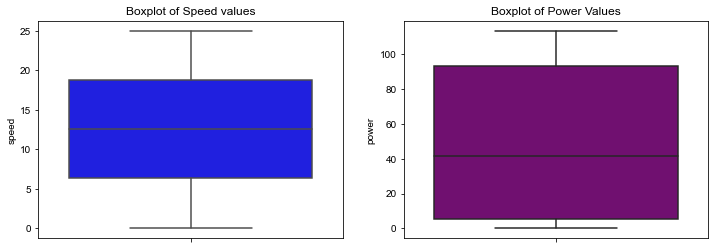

In [22]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.set(style="ticks", palette="pastel")
sns.boxplot(y=df['speed'], ax=axes[0], color="blue")
# add a title
axes[0].set_title("Boxplot of Speed values")
sns.boxplot(y=df['power'], ax=axes[1], color="purple")
axes[1].set_title("Boxplot of Power Values");

The skewness of the data is a measure of assymetry which can be seen by the lopsidedness of a boxplot.
Wind speed appears to be quite symmetric. The wind speed boxplot is cut pretty much in half by the median. Power appears to be soemwhat skewed to the right as the boxplot shows more of the box to the right or above the median line.
A boxplot with the median closer to the lower quartile is considered positively skewed. Positively skewed data has the mean greater than the median and it can be interpreted as having a higher frequency of high valued scores. The lower values of power are closer together than the higher power values.


### Describing the dataset visualisations - maybe move some visualisations up before the statistics
This section will look at some graphical EDA of the univariate data in the dataset.
Some visualisations of the dataset that can be used to verify these summary statistics. 
Plots can highlight any obvious relationships between the different variables in the dataset. They can also be used to identify any groups of observations that are clearly separate to other groups of observations.

#### Histogram and Kernel Density estimate plots of Speed and Power values
Histograms can be used to show the distribution of a single quantitative variable such as the speed or power in this dataset. A histogram visualises the centre and spread of the distribution as well as showing if there is any skew in the data. 
Such a plot charts the data using adjacent rectangular bars and displays either the frequency or relative frequency of the measurements for a range of values in each interval. Each interval or range of values is a *bin*. The number of bins can be specified although seaborn and matplotlib will automatically choose this. The number of bins chosen usually depends on the amount of data and the shape of the distribution. Changing the number of bins can reveal some other features of the data.


(The mode is the most frequently occuring value in a distribution. There is no mode function in pandas or even numpy. It is not really used as such except for describing whether a distribution is unimodal, bimodal or multimodal which depends on how many peaks there is in the distribution. In multimodal distributions there is no unique highest mode.)

The histogram of wind speed looks to be uniformly distributed with wind speed values spread out from zero up to 25 which seems to be the max speed value. Power values on the other hand looks bimodla with two defined peaks, one around zero power values and the second around the 100 kilowatt mark. 

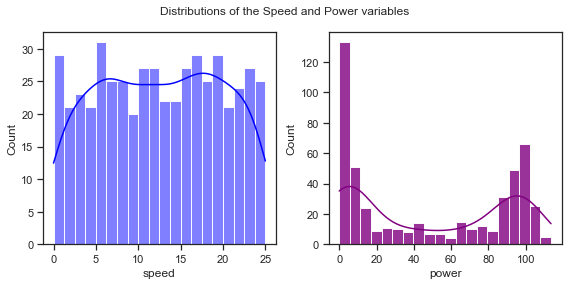

In [23]:
%matplotlib inline

# plot the histograms of Speed values
f, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.histplot(data=df, x="speed", ax=axs[0], bins=20, kde=True,color="blue")
sns.histplot(data=df, x="power", alpha=.8, legend=False, ax=axs[1], bins=20, kde=True, color="purple")
plt.suptitle("Distributions of the Speed and Power variables")
f.tight_layout()

## Investigating a relationship between Wind Speed and Wind Turbine Power output

Scatter plots are useful to identify trends and patterns in a dataset which might indicate a relationship between variables. The dataset here contains two numerical variables wind speed and turbine power values. 
The ordered pairs of numbers consisting of the independent variable 'wind speed' and the dependent variable 'power output' are plotted below resulting in a joint distribution of the two variables. Each point represents an actual observation is the dataset with a speed and a corresponding power value. 
The scatter plot shows an increasing linear trend in the middle range of the wind speed values. This would indicate that for increasing wind speeds in this range, power output values do increase, but only after a minimum wind speed has been reached. Power outputs then increase in line with increases in wind speed until it reaches a peak and plateaus.
The correlation statistics puts a numerical value on the strength and direction of the relationship. 

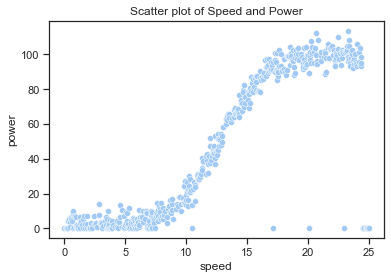

In [24]:
# create the plot
sns.scatterplot(x=df['speed'],y=df['power'])
# add title
plt.title("Scatter plot of Speed and Power");

### Correlation and Covariance of Speed and Power values
For two quantitative variables such as the wind speed and power values, the covariance and correlation can be used to determine whether a linear relationship between variables does exist and to show if one variable tends to occur with large or small values of another variable.

The [Covariance](https://en.wikipedia.org/wiki/Covariance) is a measure of the joint variability of two random variables and the (Pearson) [correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is the normalised version of the covariance which shows by its magnitude the strength of the linear relation.

The covariance can be used to see how much two variables such as wind speed and wind turbine power vary with each other and in what direction turbine power output will move when wind speed value moves. 
If the covariance here is positive it would mean that when the wind speed measurement is above it's mean then the wind turbine power measurement will more than likely be above it's mean also and vice versa. 
If the covarince here is negative, when wind speed measurements are above their mean value, then the wind turbine power output is likely to be below its mean value.
If there is a zero covariance (or a covariance value close to zero) this implies that the two variables wind speed and wind turbine output vary independently of each other. 

The correlation statistics are computed from pairs of arguments. If there is a strong positive relationship between the wind speed and wind turbine power output variables, we would expect to see a correlation coefficient close to 1. A strong negative relationship would have a correlation coefficient value close to -1. A value close to zero would indicate that there is no relationship between the variables. The correlation is easier to interpret than the covariance as it does not depend on the units of measurement or which variable is the independent variable and which is the dependent variable. 

Pandas can be used to easily calculate the covariance and correlation coefficient. The correlation coefficient here of 0.85 shows there is a very strong positive relationship between the wind speed and turbine power output.

(It should be noted that correlation however is not the same as causation.)


In [25]:
df.cov()
df.corr()

,speed,power
speed,1.000000,0.853778
power,0.853778,1.000000


### Regression plots
The Python Seaborn library has some regression plots that can be used to quickly visualise relationships and patterns that may exist in the data. They use statistical models to estimate a simple relationship between sets of observations and are mainly used to visualise patterns in a dataset during the exploratory data analysis. There are other Python libraries such as **statsmodels** that are recommended for looking at more quantitative measures concerning the fit of the regression models which can be looked at later on!.

The scatter plot earlier showed a relationship between wind speeds and wind turbine power that is not quite linear. There does seem to be a somewhat linear relationship for wind speeds between values of about 10 up to about 18 or so. Therefore it is worth looking at higher order polynomials as well as linear regression.
The plot below shows that the polynomial with order 3 looks a much better fit to the line than the first or second order linear regression lines. 

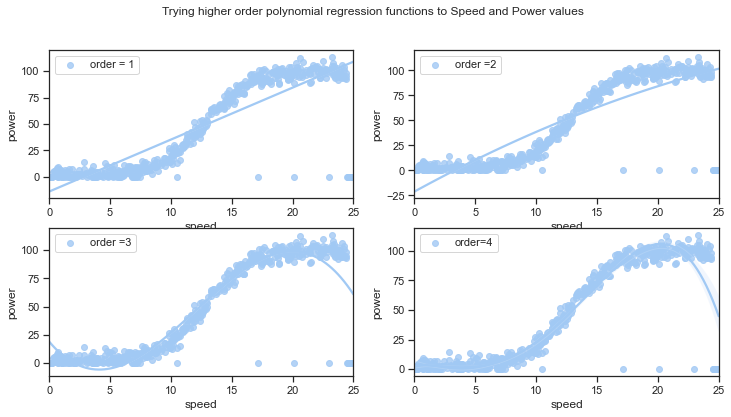

In [26]:
f, axes = plt.subplots(2, 2, figsize=(12, 6))
x = "speed"
y = "power"
sns.regplot(x="speed", y="power", data=df, ax=axes[0,0], label="order = 1", ci=False); axes[0,0].legend()
sns.regplot(x="speed", y="power", data=df, order=2, ax=axes[0,1], label="order =2", ci=False); axes[0,1].legend()
sns.regplot(x="speed", y="power", data=df, order=3, ax=axes[1,0], label="order =3", ci=False); axes[1,0].legend()
sns.regplot(x="speed", y="power", data=df, order=4, ax=axes[1,1], label = "order=4"); axes[1,1].legend()
plt.legend()
plt.suptitle("Trying higher order polynomial regression functions to Speed and Power values")
plt.show()

#### Using a lowess smoother to fit a regression of speed and power
Another way of fitting a nonparametric regression is to use
[lowess smoothing](https://www.statisticshowto.datasciencecentral.com/lowess-smoothing/) to fit a line to a scatter plot where noisy data values, sparse data points or weak interrelationships might interfere with your ability to see a line of best fit. (Lowess smoothing is also used for linear regression where least squares fitting doesn’t create a line of good fit or is too labor-intensive to use)

Lowess are non-parametric strategies for fitting a smooth curve to data points. A parametric fitting assumes the data fits some distribution which can misrepresent the data whereas non-parametric smoothers try to fund a curve of best fit without assuming the data must fit some distribution shape.


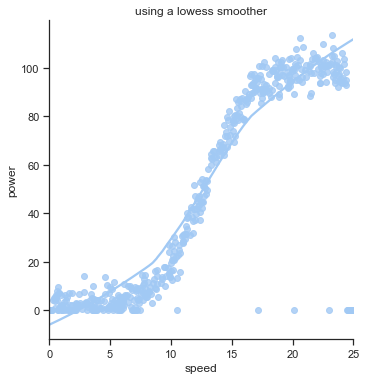

In [27]:
sns.lmplot(x="speed", y="power", data=df, lowess=True)
plt.title("using a lowess smoother")
plt.show()

Residual plots can be used to check whether the simple regression model of speed ~ power  is appropriate for a dataset.
A residplot fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around y = 0. If there is structure in the residuals, this suggests that simple linear regression is not appropriate for the data.

If the residual plot does have a shape this suggest non-linearity in the data set.

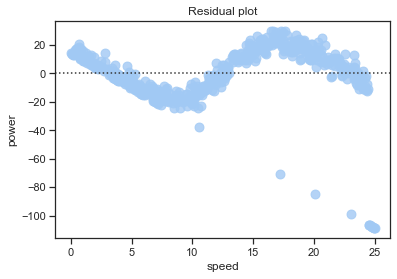

In [28]:
sns.residplot(x="speed", y="power", data=df, scatter_kws={"s": 80})
plt.title("Residual plot"); plt.show()

---
## Researching Wind Turbines
As there is little in the dataset apart from two columns of 500 floating numbers, I need to do a little research to find out what these values represent and how they are quantified. Power is probably in kilowatts and speed in something per hour!. There is a mention of 15 metres per second at the turbine in the video.
I am looking up some information about Irish wind farms. I'm presuming where exactly the data came from does not matter. 

[The Irish Wind Energy Association (IWEA)](https://www.iwea.com/about-us/about-us) is the representative body for the Irish wind industry, working to promote wind energy as an essential, economical and environmentally friendly part of the country’s low-carbon energy future. 
They note here that in 2018 wind energy provided 29 per cent of Ireland’s electricity.

Their [FAQs](https://www.iwea.com/about-wind/faqs) page tells us that each quarter, both EirGrid and ESBN publish updated wind farm statistics for Ireland at the following links:
[ESBN Connected Wind Farms](https://www.esbnetworks.ie/new-connections/generator-connections/generator-connection-statistics).
There is currently 4,130 MW of installed capacity in ROI and new Eirgrid link here http://www.eirgridgroup.com/how-the-grid-works/renewables/

Also on this website is a question about how much electricity a turbine generates. (See FAQ 16.)

>The amount of electricity a turbine can generate depends on the type of turbine and the wind conditions at any time. There are many different models of turbines that can generate different amounts of electricity. Ireland’s largest wind farm is the Galway Wind Park in Connemara. The turbines there are 3 MW turbines. To use them as an example, when the wind is blowing steadily they can each generate 3 MW of electricity. A megawatt (MW) is a unit of energy.A single megawatt is equivalent to around 1,000 kilowatts. Boiling a kettle, for example, takes around two kilowatts.

Another website of interest is Eirgrid's [Smart grid dashboard](http://smartgriddashboard.eirgrid.com/#all/about).
The [dashboard](http://smartgriddashboard.eirgrid.com/#all/wind)shows actual and forecast wind generation by day, week and month for allwind farms on the system.

The [sem-o.com](https://www.sem-o.com/links/) that we looked at in Data Representation might be worth a look also. It has a page of links. Not sure yet how much detail if any I need. The data.gov.ie might have some datasets.
Also the EU Open data portal has some datasets.
https://data.europa.eu/euodp/en/data/dataset/jrc-emhires-wind-generation-time-series
[Electricity from wind power; AC; production mix, at power plant; < 1kV (Location: RER)](https://data.europa.eu/euodp/en/data/dataset/jrc-eplca-fe1c3d03-072b-4da7-8fff-3505f9b01efc)

- [WindEurope](https://windeurope.org/data-and-analysis/) has facts and issues about wind energy in Europe, in particular the section on [Wind Energy Basics](https://windeurope.org/about-wind/wind-basics/)

Watching the video on this project again, the lecturer Ian notes how the idea for the project came about. 
Say a company produces power using wind turbines. In the electricity market, producers of electricity would sell their electricity ahead of time.  They enter into a contract that says they will produce so many kilowatts  electricity during at a certain time, maybe between 11am tomorrow and 11am the next day. The price is negotiated today and tomorrow you start generating electricity and pushing it onto the supply grid. 
It is easier for those burning coal or gas or doing nuclear fusion to burn the right amount to generate the right amount of electricity. With wind turbines however you don't know how much electricity you will generate tomorrow because your generation of electricity depends on wind power. As you don't know how much wind there is going to be tomorrow you make an estimate by getting some meterological data from Met Eireann or some other weather prediction agent and use the weather prediction to help you predict how much electricity you are likely to produce. The prediction may not always be correct but you aim to reduce how often your calculations are wrong.

A first step in that kind of workflow would be to say when the wind speed is X amount, for example at 15 metres per second at the turbine, how much power is produced from the wind turbines. The wind turbine supplier would have provided a rough estimate of how much power the turbine is capable of producing at 15 metres per second. Knowing all this is not really necessary for this project but to instead take the dataset with the two columns of numerical values and be able to predict one of the numbers from the other.




Based on above, it is likely that the wind speed is measuring in so many metres per second. The video mentions 15 as an example but I need to check this out. Power is most likely in kilowatts. I need to look up some more on this.
As noted above in the initial investigation of the dataset, there are quite a number of zero values for power in the dataset. I need to determine whether these values are valid and if so should they remain in the data when I go to the next step of training a model. As theorised earlier, perhaps some of the low or zero values are there when a wind turbine is powered on after being off and taking some time or effort to be productive. However I need to check as I don't know the physics or technical reasons behind this. While most of the zero power values are associated with low values of speed, there are some that are not and occur when the wind speed is actually at it's max in the dataset so therefore there must be another reason that the power output is zero at such levels, as if the wind turbine is actually power off completely and maybe this is the case. Maybe it switches off after a certain max wind speed for safety or other reasons. These values do look like outliers on the scatter plot.
The scatter plot seems to have three different trends apparent as shown earlier, the first section at low values of wind speed where the wind turbine values are clustered around zero (including the 10% of observations that have zero power values), the second section where there seems to be a linear trend between wind speed and power output and thirdly the last section where the values of power have reached a peak at higher wind speeds and plateau, and also the outliers here.


---
### How does wind energy work
Find out some more on how wind energy works. Look at the section on [Wind Energy Basics](https://windeurope.org/about-wind/wind-basics/) on WindEurope website.
Few facts here:
- energy is the ability to do work
- [What is Energy ?](https://windeurope.org/about-wind/wind-basics/). 
>Generally, energy can be categorised into either kinetic energy (the energy of moving objects) or potential energy (energy that is stored). The different types of energy include thermal energy, radiant energy, chemical energy, electrical energy, motion energy, sound energy, elastic energy and gravitational energy.
In the case of wind energy, wind turbines take the kinetic energy that’s in the wind and convert that kinetic energy into mechanical power. We mostly use this mechanical power in the form of electricity.

There is plenty more her on how wind is actually caused by 3 things: the heating of the atmosphere by the sun,  the rotation of the earth and the Earth's surface irregularities.
Wind energy captures the energy of the wind and converts it to electricity. It is an alternative to burninf fossil fuels.
A wind turbine is a device that converts kinetic energy from the wind into electricity. A group of wind turbines is a wind farm. There are both on-shore and off-shore types. Their output ranges from as small as 100 kilowatts to as big as 12 megawatts.
There are three main variables determining how much electricity a turbine can produce.
- Wind speed
- Blade radius
- Air density.

Our dataset only has wind speed and power values so perhaps we can assume these values are constant for the dataset, particularly I would think the blade radius. 
The article also outlines what happens when the wind doesn't blow. A wind farms location is usually chosen purposely. Therefore when a wind turbine is not turning it is usually because of maintenance, or because it must be stopped for safety reasons in case of strong winds or a storm. So safety reasons would account for the zero power values at the very high values of wind speed and maintenance could account for some of the other zero values Therefore I may need to see exactly what the pattern is here. Perhaps then some of the zero values should be ommited from some of the analysis and model training, or perhaps done alongside.

In [29]:
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [30]:
df.sort_values(by='speed', ascending=False).head()

,speed,power
499,25.000,0.0
498,24.950,0.0
497,24.875,0.0
496,24.850,0.0
495,24.775,0.0


# Machine Learning.

Here I am going to start looking at applying some machine learning algorithms to the dataset. The 3 algorithms I will start looking at are as follows:

- Classification: Identifying which category an object belongs to.

- Regression: Predicting a continuous-valued attribute associated with an object.


The goal of the project is to predict wind power from wind speed and therefore this problem falls into supervised learning. 
>Supervised learning is where you have input variables (x) and an output variable (Y) and you use an algorithm to learn the mapping function from the input to the output [Machine Learning Mastery](https://machinelearningmastery.com/supervised-and-unsupervised-machine-learning-algorithms/) which is precisely what we have been asked to do here.



In [31]:
# first importing the following libraries
# Numerical arrays.
import numpy as np
import pandas as pd  
# plotting
import matplotlib.pyplot as plt 
import seaborn as sns

import csv
# Import linear_model from sklearn.
import sklearn.linear_model as lm

In [32]:
# save link to data and reference the link 
csv_url = 'https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv'
# read the csv data into a pandas dataframe
df = pd.read_csv(csv_url)
df
# write the dataframe to csv
df.to_csv('df.csv')

### A recap of the dataset
Note as yet I have don't no data cleaning or scaling etc. I don't think I should remove the zero values as these may be important as outlined earlier.  I have not split the dataset yet into training and testing sets. All to come!

First a recap of the dataset and some statistics before going any further.
The two variables do appear to be correlated but the relationship is not linear, at least not for all of the dataset. The scatter plot earlier in the notebook using Seaborn plots showed a relationship between wind speeds and wind turbine power that is non-linear and therefore I looked at higher order polynomials. 
The linear regression model clearly underfit the data. There were large sections of the dataset that were either under the regression line or above the regression line.

The plot of the polynomial with order 3 looked to be a better fit to the line than the first or second order linear regression lines
I did look at the numpy polyfit functions the last time I had a look at this but I am going to look at the scikit-learn package instead this time. I can still refer to the polyfit models in the old notebook which I will be deleting of course!

In [79]:
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [80]:
df.corr()

,speed,power
speed,1.000000,0.853778
power,0.853778,1.000000


In [82]:
# Plots styles.
plt.style.use('ggplot')

# Plot size.
plt.rcParams['figure.figsize'] = (10, 6)

In [83]:
# assign speed to x and power to y
x = df.speed
y = df.power

In [85]:
# Do regression on the x and y arrays using numpy.
np.polyfit(x, y, 1)

array([  4.91759567, -13.89990263])

In [86]:
# Create variables with those values.
m, c = np.polyfit(x, y, 1)
# Have a look at m and c.
m, c

(4.917595665404671, -13.89990263051961)

As the plot below shows, there are sections of the fitted line where all the values either fall below the line or above the line. If a linear model was suitable you would expect to see the line going through the centre of the data. The quadratic model does not improve on this. The cubic polynomial fits the data better and the fourth order polynomial does seem to be even better for the datapoints at the lower end.

In [87]:
# Calculate mean x and mean y.
x_avg = np.mean(x)
y_avg = np.mean(y)

# Subtract means from x and y.
x_zero = x - x_avg
y_zero = y - y_avg

# Dot product of mean-adjusted x and y divided by dot product of mean adjusted x with itself.
m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)
# Subtract m times average x from average y.
c = y_avg - m * x_avg

# Let's have a look - same values as above.
m, c

(4.917595665404668, -13.899902630519541)

$ax^3+bx^2+cx+d=0$

In [88]:
# Create variables with those values.
a,b,c,d =np.polyfit(x, y, 3)

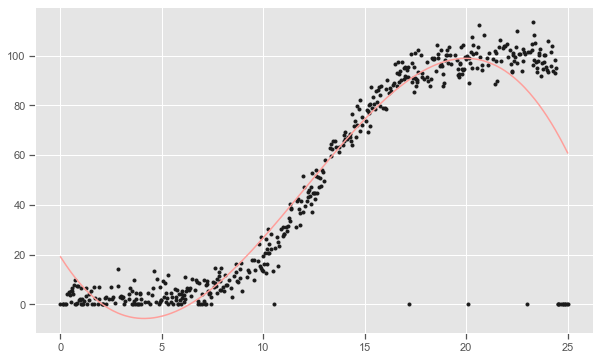

In [89]:
# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x *x + b * x * x+ c*x + d, 'r-')

### A Fourth order polynomial
$ax^4+bx^3+cx^2+dx +e=0$


In [90]:
# Create variables with those values.
a,b,c,d,e =np.polyfit(x, y, 4)

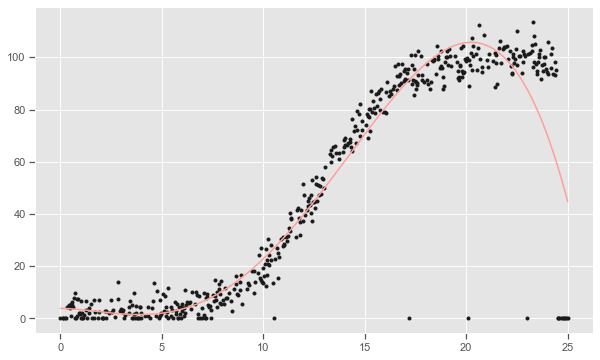

In [91]:
# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x *x* x + b * x * x* x + c * x * x + d* x + e, 'r-')

https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares

LinearRegression fits a linear model with coefficients to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.
LinearRegression will take in its fit method arrays X, y and will store the coefficients  of the linear model in its coef_ member:

In [92]:
# assign speed to x and power to y, 
x = np.array(df.speed)
y = np.array(df.power)
# for indexing the array
x = x[:, np.newaxis]
x.shape
y = y[:, np.newaxis]
y.shape

(500, 1)

In [93]:
# Create a linear regression model instance.
reg = lm.LinearRegression()

In [94]:
# Train the model using the training sets
reg.fit(x,y)

LinearRegression()

In [95]:
# Here's our intercept.
reg.intercept_

array([-13.89990263])

In [96]:
reg.coef_

array([[4.91759567]])

In [97]:
# See how good our fit is.
#reg.score(x, y)

In [98]:
#plt.plot(x, y, 'x')

In [99]:

reg = lm.Ridge(alpha=.5)

In [100]:
reg.fit(x,y)

Ridge(alpha=0.5)

In [101]:
reg.coef_

array([[4.91750127]])

In [102]:
reg.intercept_

array([-13.89871419])

## Machine Learning - Neural Networks

Here I will go through the lecture notes first and apply some of the techniques.

Machine learning is the science of getting computers to act without being explicitly programmed.
- https://www.investopedia.com/terms/n/neuralnetwork.asp#:~:text=A%20neural%20network%20is%20a,organic%20or%20artificial%20in%20nature.
- https://en.wikipedia.org/wiki/Artificial_neural_network

- https://news.mit.edu/2017/explained-neural-networks-deep-learning-0414

>Neural nets are a means of doing machine learning, in which a computer learns to perform some task by analyzing training examples.
>Modeled loosely on the human brain, a neural net consists of thousands or even millions of simple processing nodes that are densely interconnected. Most of today’s neural nets are organized into layers of nodes, and they’re “feed-forward,” meaning that data moves through them in only one direction. An individual node might be connected to several nodes in the layer beneath it, from which it receives data, and several nodes in the layer above it, to which it sends data.
>To each of its incoming connections, a node will assign a number known as a “weight.” When the network is active, the node receives a different data item — a different number — over each of its connections and multiplies it by the associated weight. It then adds the resulting products together, yielding a single number. If that number is below a threshold value, the node passes no data to the next layer. If the number exceeds the threshold value, the node “fires,” which in today’s neural nets generally means sending the number — the sum of the weighted inputs — along all its outgoing connections.
When a neural net is being trained, all of its weights and thresholds are initially set to random values. Training data is fed to the bottom layer — the input layer — and it passes through the succeeding layers, getting multiplied and added together in complex ways, until it finally arrives, radically transformed, at the output layer. During training, the weights and thresholds are continually adjusted until training data with the same labels consistently yield similar outputs.
[Mit News](https://news.mit.edu/2017/explained-neural-networks-deep-learning-0414)[nn1]


First referring to the [Introduction to Keras for Engineers](https://keras.io/getting_started/intro_to_keras_for_engineers/) article and making some notes.


- First we need to prepare the data before training the model by by turning it into either NumPy arrays or tf.data.Dataset objects). 
The dataset for this project is in csv format. I have already read it into a pandas dataframe but it can be easily converted into a numpy array. 

x = np.array(df.speed)
y = np.array(df.power)

- Do preprocessing such as feature normalisation.
The data consists of two columns of data and thats it. The only preprocesing that is applicable here is to rescale the data to small values as in general the input values to a neural network should be close to zero. According to the tutorial  the data should either be rescaled to have zero-mean and unit-variance or the data in the `[0.1]` range. The preprocessing should ideally be done as part of the model to make it more portable in production. In Keras the preprocessing is done via preprocessing layers which can be included directly into your model either during training or after training. Some preprocessing layers have a state, in this case normalization holds the mean and variance of the features and can be obtained by calling `layer.adapt(data)` on a sample or all of the training data.

## Data loading and preprocessing
>Neural networks don't process raw data, like text files, encoded JPEG image files, or CSV files. They process vectorized & standardized representations.

CSV data needs to be parsed, with numerical features converted to floating point tensors and categorical features indexed and converted to integer tensors. Then each feature typically needs to be normalized to zero-mean and unit-variance.



Build a model that turns your data into useful predictions
Train your model with the built-in Keras fit() method
Evaluate your model on a test data and how to use it for inference on new data
Customize what fit() does,
Speed up training by leveraging multiple GPUs. - I don't think we will need this here!
Refine your model through hyperparameter tuning

In [103]:
x = np.array(df.speed)
y = np.array(df.power)

In [104]:
X =  np.vstack([x, y]).T
X.size 
# 1000
X.shape
# (500, 2)

(500, 2)

In [72]:
mean = np.mean(X)
X -= mean
print(mean)
std = np.std(X, axis=0)
X /= std


30.302491000000003


In [105]:
from tensorflow.keras.layers.experimental.preprocessing import Normalization

# Example image data, with values in the [0, 255] range
training_data = X

normalizer = Normalization(axis=1)
normalizer.adapt(X)


normalized_data = normalizer(training_data)
print("var: %.4f" % np.var(normalized_data))
print("mean: %.4f" % np.mean(normalized_data))

var: 1.0000
mean: -0.0000


In [106]:
normalized_data

<tf.Tensor: shape=(500, 2), dtype=float32, numpy=
array([[-1.74436295e+00, -1.15494812e+00],
       [-1.72704458e+00, -1.15494812e+00],
       [-1.72358096e+00, -1.15494812e+00],
       [-1.71318984e+00, -1.15494812e+00],
       [-1.70626259e+00, -1.15494812e+00],
       [-1.69933522e+00, -1.05076969e+00],
       [-1.68894422e+00, -1.03020346e+00],
       [-1.68201685e+00, -1.06291699e+00],
       [-1.67495084e+00, -1.12973940e+00],
       [-1.67148721e+00, -1.02137554e+00],
       [-1.66802359e+00, -9.98644471e-01],
       [-1.66455984e+00, -1.02888048e+00],
       [-1.65763247e+00, -1.05343974e+00],
       [-1.65070522e+00, -9.63140607e-01],
       [-1.64724147e+00, -9.20516729e-01],
       [-1.64377785e+00, -1.15494812e+00],
       [-1.64031410e+00, -1.15494812e+00],
       [-1.63338685e+00, -9.80050623e-01],
       [-1.62992311e+00, -1.13582516e+00],
       [-1.62645948e+00, -9.78150427e-01],
       [-1.61606848e+00, -1.10693610e+00],
       [-1.61260474e+00, -1.11624503e+00],
    

In [107]:
# Neural networks.
import tensorflow.keras as kr

# Numerical arrays
import numpy as np

# Data frames.
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

In [108]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

For now I will use the entire dataset for training as I am only trying to figure it out.
The data is already numerical so no encoding is required.
The training set will be the speed and power values from the dataset.
I initially followed the lectures and used just one neuron but this did not do so well.

For now I am following a tutorial from here
https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/ which demonstrates a fully connected network structure with three layers.

Create a Sequential Model and  add layers one at a time until happy with the network architecture.
The first thing is to ensure the input layer has the right number of input features. The dataset here has only a single input feature which is wind speed. How to determine the correct number of layers to use? According to the tutorial its a matter of trial and error really. Generally you need a network large enough to capture the structure of the problem.

Fully connected layers are defined using the `Dense` class. The number of neurons or nodes in the layer as the first argument and specify the activation function using the `activation` argument. The demo uses the `rectified linear unit` activation function referred to as ReLU on the first two layers and the Sigmoid function in the output layer. As far as I recall Ian recommended using just the Sigmoid activation function. According to the tutorial, Sigmoid and Tanh activation functions were the preferred choice  for all layers before but that these days better performance is achieved using the ReLU activation function. I can try one or the other.  A `Sigmoid` layer is used on the outer layer to ensure the network output is between 0 and 1. (This problem though is not looking to classify the data into one of two classes.).
The input shape is 1 as there is only 1 input variable. (input_dim=1 or input_shape=(1,))
The shape of the input to the model is defined as an argument on the first hidden layer. The first line of code that adds the first Dense layer does 2 things, defines the input or visible layer and the first hidden layer.


This is the code from the tutorial which had 8 inputs. I am following the lecture first though.
```python
# compile the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
```

I am just going to play around with it and try the different parameters!

In [142]:
# Create a neural network with 20 neurons.
model = kr.models.Sequential()
# the first layer with one input, kernel_initializer='ones' 
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='glorot_uniform', bias_initializer='zeros'))

model.add(kr.layers.Dense(40, activation='sigmoid'))
model.add(kr.layers.Dense(1, activation="linear",  kernel_initializer='glorot_uniform'))

### Compile the model\
- still following machinelearning mastery tutorial
Once the model is defined, it can be compiled. We specify the learning rate and the loss function which we want to minimise.

When compiling, some additional properties are required when training the network. Training a network means finding the best set of weights to map inputs to outputs in our dataset. The loss function must be specified
>We must specify the loss function to use to evaluate a set of weights, the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training.

The tutorial uses cross entrophy as the loss argument as it is looking at a binary classification problem. We are to stick with mean squared error I think.
>The optimizer is defined below as the efficient stochastic gradient descent algorithm “adam“. This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.


In [143]:
model.compile('adam', loss='mean_squared_error')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_17 (Dense)             (None, 40)                80        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 41        
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________


The model shows 63 total parameters. This is made up of the single input in the input layer, 20 neurons plus 20 bias terms in the hidden layer.
I changed it to 40 neurons next

In [131]:
# This is the unprocessed or unscaled data
x = df['speed']
y = df['power']

0       0.000
1       0.125
2       0.150
3       0.225
4       0.275
        ...  
495    24.775
496    24.850
497    24.875
498    24.950
499    25.000
Name: speed, Length: 500, dtype: float64

In [144]:
model.fit(x,y, epochs=500)

Epoch 1/500
16/16 [==============================] - 0s 1ms/step - loss: 3909.0310
Epoch 2/500
16/16 [==============================] - 0s 2ms/step - loss: 3855.9199
Epoch 3/500
16/16 [==============================] - 0s 1ms/step - loss: 3802.0657
Epoch 4/500
16/16 [==============================] - 0s 2ms/step - loss: 3748.1370
Epoch 5/500
16/16 [==============================] - 0s 2ms/step - loss: 3693.7849
Epoch 6/500
16/16 [==============================] - 0s 1ms/step - loss: 3639.1758
Epoch 7/500
16/16 [==============================] - 0s 1ms/step - loss: 3583.9380
Epoch 8/500
16/16 [==============================] - 0s 2ms/step - loss: 3527.4915
Epoch 9/500
16/16 [==============================] - 0s 1ms/step - loss: 3470.3362
Epoch 10/500
16/16 [==============================] - 0s 1ms/step - loss: 3413.5518
Epoch 11/500
16/16 [==============================] - 0s 2ms/step - loss: 3355.7764
Epoch 12/500
16/16 [==============================] - 0s 2ms/step - loss: 3299.0449
E

16/16 [==============================] - 0s 1ms/step - loss: 1106.1569
Epoch 99/500
16/16 [==============================] - 0s 2ms/step - loss: 1092.0055
Epoch 100/500
16/16 [==============================] - 0s 1ms/step - loss: 1078.1460
Epoch 101/500
16/16 [==============================] - 0s 2ms/step - loss: 1064.1681
Epoch 102/500
16/16 [==============================] - 0s 1ms/step - loss: 1050.6127
Epoch 103/500
16/16 [==============================] - 0s 1ms/step - loss: 1037.0647
Epoch 104/500
16/16 [==============================] - 0s 1ms/step - loss: 1023.3582
Epoch 105/500
16/16 [==============================] - 0s 1ms/step - loss: 1010.0141
Epoch 106/500
16/16 [==============================] - 0s 1ms/step - loss: 996.8588
Epoch 107/500
16/16 [==============================] - 0s 1ms/step - loss: 983.6595
Epoch 108/500
16/16 [==============================] - 0s 2ms/step - loss: 970.6225
Epoch 109/500
16/16 [==============================] - 0s 2ms/step - loss: 957.7498

16/16 [==============================] - 0s 2ms/step - loss: 340.8974
Epoch 196/500
16/16 [==============================] - 0s 1ms/step - loss: 338.3246
Epoch 197/500
16/16 [==============================] - 0s 2ms/step - loss: 336.1529
Epoch 198/500
16/16 [==============================] - 0s 1ms/step - loss: 333.5316
Epoch 199/500
16/16 [==============================] - 0s 1ms/step - loss: 331.0673
Epoch 200/500
16/16 [==============================] - 0s 1ms/step - loss: 328.8571
Epoch 201/500
16/16 [==============================] - 0s 1ms/step - loss: 326.7102
Epoch 202/500
16/16 [==============================] - 0s 1ms/step - loss: 324.4247
Epoch 203/500
16/16 [==============================] - 0s 1ms/step - loss: 322.7756
Epoch 204/500
16/16 [==============================] - 0s 2ms/step - loss: 320.1736
Epoch 205/500
16/16 [==============================] - 0s 1ms/step - loss: 318.3478
Epoch 206/500
16/16 [==============================] - 0s 1ms/step - loss: 316.3695
Epoch 

16/16 [==============================] - 0s 2ms/step - loss: 257.1060
Epoch 293/500
16/16 [==============================] - 0s 2ms/step - loss: 256.8116
Epoch 294/500
16/16 [==============================] - 0s 1ms/step - loss: 256.7068
Epoch 295/500
16/16 [==============================] - 0s 1ms/step - loss: 256.6770
Epoch 296/500
16/16 [==============================] - 0s 2ms/step - loss: 256.4880
Epoch 297/500
16/16 [==============================] - 0s 2ms/step - loss: 256.3989
Epoch 298/500
16/16 [==============================] - 0s 1ms/step - loss: 256.1775
Epoch 299/500
16/16 [==============================] - 0s 1ms/step - loss: 256.1221
Epoch 300/500
16/16 [==============================] - 0s 1ms/step - loss: 256.0233
Epoch 301/500
16/16 [==============================] - 0s 1ms/step - loss: 255.8964
Epoch 302/500
16/16 [==============================] - 0s 1ms/step - loss: 255.7739
Epoch 303/500
16/16 [==============================] - 0s 2ms/step - loss: 255.7920
Epoch 

16/16 [==============================] - 0s 1ms/step - loss: 251.0712
Epoch 390/500
16/16 [==============================] - 0s 1ms/step - loss: 251.1267
Epoch 391/500
16/16 [==============================] - 0s 1ms/step - loss: 251.0655
Epoch 392/500
16/16 [==============================] - 0s 1ms/step - loss: 251.1012
Epoch 393/500
16/16 [==============================] - 0s 1ms/step - loss: 250.9615
Epoch 394/500
16/16 [==============================] - 0s 1ms/step - loss: 250.9562
Epoch 395/500
16/16 [==============================] - 0s 1ms/step - loss: 250.9583
Epoch 396/500
16/16 [==============================] - 0s 1ms/step - loss: 250.9208
Epoch 397/500
16/16 [==============================] - 0s 1ms/step - loss: 250.9507
Epoch 398/500
16/16 [==============================] - 0s 1ms/step - loss: 250.9001
Epoch 399/500
16/16 [==============================] - 0s 1ms/step - loss: 250.8906
Epoch 400/500
16/16 [==============================] - 0s 1ms/step - loss: 250.7123
Epoch 

16/16 [==============================] - 0s 1ms/step - loss: 249.4698
Epoch 487/500
16/16 [==============================] - 0s 1ms/step - loss: 249.5379
Epoch 488/500
16/16 [==============================] - 0s 1ms/step - loss: 249.5665
Epoch 489/500
16/16 [==============================] - 0s 1ms/step - loss: 249.8244
Epoch 490/500
16/16 [==============================] - 0s 1ms/step - loss: 249.5217
Epoch 491/500
16/16 [==============================] - 0s 981us/step - loss: 249.4388
Epoch 492/500
16/16 [==============================] - 0s 1ms/step - loss: 249.4567
Epoch 493/500
16/16 [==============================] - 0s 1ms/step - loss: 249.5105
Epoch 494/500
16/16 [==============================] - 0s 1ms/step - loss: 249.4750
Epoch 495/500
16/16 [==============================] - 0s 1ms/step - loss: 249.3961
Epoch 496/500
16/16 [==============================] - 0s 1ms/step - loss: 249.6208
Epoch 497/500
16/16 [==============================] - 0s 1ms/step - loss: 249.6050
Epoc

In [145]:
# Train the neural network on our training data.
#model.fit(df['x'], df['y'], epochs=500)
model.fit(X[:,0],X[:,1], epochs=500, batch_size=10)

Epoch 1/500
50/50 [==============================] - 0s 1ms/step - loss: 249.7155
Epoch 2/500
50/50 [==============================] - 0s 2ms/step - loss: 249.7708
Epoch 3/500
50/50 [==============================] - 0s 2ms/step - loss: 249.7647
Epoch 4/500
50/50 [==============================] - 0s 2ms/step - loss: 249.7026
Epoch 5/500
50/50 [==============================] - 0s 2ms/step - loss: 249.7775
Epoch 6/500
50/50 [==============================] - 0s 2ms/step - loss: 249.7475
Epoch 7/500
50/50 [==============================] - 0s 2ms/step - loss: 250.1000
Epoch 8/500
50/50 [==============================] - 0s 2ms/step - loss: 249.6806
Epoch 9/500
50/50 [==============================] - 0s 1ms/step - loss: 249.8179
Epoch 10/500
50/50 [==============================] - 0s 1ms/step - loss: 249.3648
Epoch 11/500
50/50 [==============================] - 0s 1ms/step - loss: 249.5620
Epoch 12/500
50/50 [==============================] - 0s 2ms/step - loss: 249.6320
Epoch 13/500


50/50 [==============================] - 0s 1ms/step - loss: 248.1805
Epoch 100/500
50/50 [==============================] - 0s 1ms/step - loss: 247.9905
Epoch 101/500
50/50 [==============================] - 0s 1ms/step - loss: 247.9130
Epoch 102/500
50/50 [==============================] - 0s 1ms/step - loss: 247.9366
Epoch 103/500
50/50 [==============================] - 0s 1ms/step - loss: 247.9435
Epoch 104/500
50/50 [==============================] - 0s 1ms/step - loss: 248.1948
Epoch 105/500
50/50 [==============================] - 0s 1ms/step - loss: 247.8857
Epoch 106/500
50/50 [==============================] - 0s 2ms/step - loss: 247.9539
Epoch 107/500
50/50 [==============================] - 0s 2ms/step - loss: 247.9524
Epoch 108/500
50/50 [==============================] - 0s 1ms/step - loss: 247.8173
Epoch 109/500
50/50 [==============================] - 0s 1ms/step - loss: 247.8804
Epoch 110/500
50/50 [==============================] - 0s 1ms/step - loss: 247.8737
Epoch 

50/50 [==============================] - 0s 2ms/step - loss: 246.5761
Epoch 197/500
50/50 [==============================] - 0s 2ms/step - loss: 246.8546
Epoch 198/500
50/50 [==============================] - 0s 2ms/step - loss: 246.7798
Epoch 199/500
50/50 [==============================] - 0s 1ms/step - loss: 247.1259
Epoch 200/500
50/50 [==============================] - 0s 1ms/step - loss: 246.6985
Epoch 201/500
50/50 [==============================] - 0s 1ms/step - loss: 246.6838
Epoch 202/500
50/50 [==============================] - 0s 1ms/step - loss: 246.7181
Epoch 203/500
50/50 [==============================] - 0s 1ms/step - loss: 246.8457
Epoch 204/500
50/50 [==============================] - 0s 2ms/step - loss: 246.8455
Epoch 205/500
50/50 [==============================] - 0s 1ms/step - loss: 246.6879
Epoch 206/500
50/50 [==============================] - 0s 1ms/step - loss: 246.6963
Epoch 207/500
50/50 [==============================] - 0s 1ms/step - loss: 246.7161
Epoch 

50/50 [==============================] - 0s 1ms/step - loss: 245.2311
Epoch 294/500
50/50 [==============================] - 0s 1ms/step - loss: 245.5342
Epoch 295/500
50/50 [==============================] - 0s 1ms/step - loss: 245.3615
Epoch 296/500
50/50 [==============================] - 0s 1ms/step - loss: 245.3808
Epoch 297/500
50/50 [==============================] - 0s 1ms/step - loss: 245.5370
Epoch 298/500
50/50 [==============================] - 0s 1ms/step - loss: 245.2179
Epoch 299/500
50/50 [==============================] - 0s 1ms/step - loss: 245.3163
Epoch 300/500
50/50 [==============================] - 0s 1ms/step - loss: 245.3140
Epoch 301/500
50/50 [==============================] - 0s 1ms/step - loss: 245.2211
Epoch 302/500
50/50 [==============================] - 0s 1ms/step - loss: 245.1318
Epoch 303/500
50/50 [==============================] - 0s 1ms/step - loss: 245.2103
Epoch 304/500
50/50 [==============================] - 0s 1ms/step - loss: 245.4440
Epoch 

50/50 [==============================] - 0s 1ms/step - loss: 244.3269
Epoch 391/500
50/50 [==============================] - 0s 1ms/step - loss: 243.9685
Epoch 392/500
50/50 [==============================] - 0s 1ms/step - loss: 243.9289
Epoch 393/500
50/50 [==============================] - 0s 1ms/step - loss: 243.8973
Epoch 394/500
50/50 [==============================] - 0s 1ms/step - loss: 244.0657
Epoch 395/500
50/50 [==============================] - 0s 1ms/step - loss: 243.8759
Epoch 396/500
50/50 [==============================] - 0s 1ms/step - loss: 243.9174
Epoch 397/500
50/50 [==============================] - 0s 1ms/step - loss: 243.8754
Epoch 398/500
50/50 [==============================] - 0s 1ms/step - loss: 243.6246
Epoch 399/500
50/50 [==============================] - 0s 1ms/step - loss: 243.9800
Epoch 400/500
50/50 [==============================] - 0s 1ms/step - loss: 243.6467
Epoch 401/500
50/50 [==============================] - 0s 1ms/step - loss: 243.6643
Epoch 

50/50 [==============================] - 0s 2ms/step - loss: 242.5888
Epoch 488/500
50/50 [==============================] - 0s 1ms/step - loss: 242.2414
Epoch 489/500
50/50 [==============================] - 0s 1ms/step - loss: 242.3427
Epoch 490/500
50/50 [==============================] - 0s 1ms/step - loss: 242.5072
Epoch 491/500
50/50 [==============================] - 0s 1ms/step - loss: 242.1959
Epoch 492/500
50/50 [==============================] - 0s 1ms/step - loss: 242.4833
Epoch 493/500
50/50 [==============================] - 0s 1ms/step - loss: 242.2305
Epoch 494/500
50/50 [==============================] - 0s 1ms/step - loss: 242.4711
Epoch 495/500
50/50 [==============================] - 0s 1ms/step - loss: 242.1194
Epoch 496/500
50/50 [==============================] - 0s 1ms/step - loss: 241.9436
Epoch 497/500
50/50 [==============================] - 0s 1ms/step - loss: 241.9746
Epoch 498/500
50/50 [==============================] - 0s 1ms/step - loss: 241.8699
Epoch 

[]

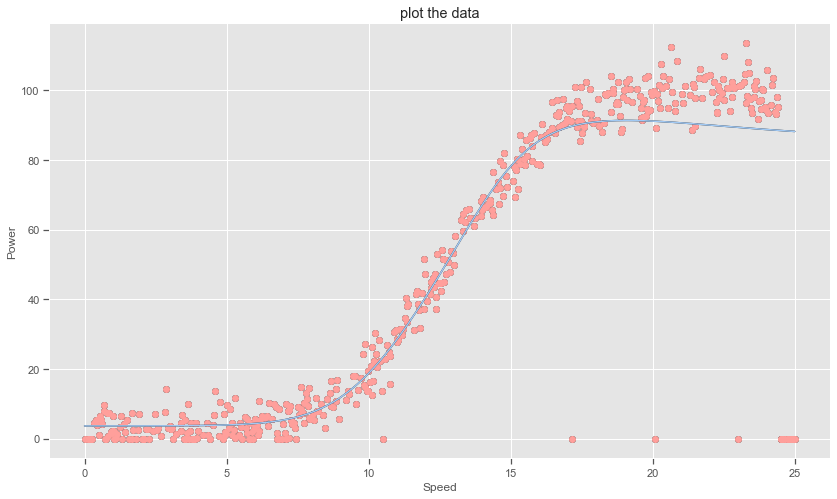

In [146]:
# This is just plotting the actual data, speed vs power
plt.plot(X[:,0],X[:,1], 'ko')
plt.plot(x,y,'ro')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.title('plot the data')
# plot the fitted model data
plt.plot(X[:,0], model.predict(X[:,0]), 'k')
plt.plot(x, model.predict(x), 'b')
plt.plot()

Train a new model using the sigmoid function as the activation function.
Using the sigmoid function instead of the linear function which is clearly not a good fit.


Now training a different model. This one has a hidden layer with 60 neurons. A different kernel initialiser is used. the batch size is how many x's are sent it at any one time. Instead of sending one x in and adjusting the weights and the biases, send it 10 at a time. This sometimes has a smoothing effect. It still sends each x in 500 times (for 500 epochs) but 10 at a time instead of 1 at a time.


In [152]:
# Train a different model.
model = kr.models.Sequential()
model.add(kr.layers.Dense(60, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error', metrics=['accuracy'])

In [153]:
# Fit the data.
model.fit(df['speed'], df['power'], epochs=500, batch_size=10)

Epoch 1/500
50/50 [==============================] - 0s 926us/step - loss: 3892.1931 - accuracy: 0.0040
Epoch 2/500
50/50 [==============================] - 0s 991us/step - loss: 3678.7256 - accuracy: 0.0000e+00
Epoch 3/500
50/50 [==============================] - 0s 956us/step - loss: 3415.5012 - accuracy: 0.0000e+00
Epoch 4/500
50/50 [==============================] - 0s 913us/step - loss: 3134.9773 - accuracy: 0.0000e+00
Epoch 5/500
50/50 [==============================] - 0s 915us/step - loss: 2927.5310 - accuracy: 0.0000e+00
Epoch 6/500
50/50 [==============================] - 0s 938us/step - loss: 2771.5481 - accuracy: 0.0000e+00
Epoch 7/500
50/50 [==============================] - 0s 878us/step - loss: 2637.4819 - accuracy: 0.0000e+00
Epoch 8/500
50/50 [==============================] - 0s 876us/step - loss: 2512.6929 - accuracy: 0.0000e+00
Epoch 9/500
50/50 [==============================] - 0s 898us/step - loss: 2388.1851 - accuracy: 0.0000e+00
Epoch 10/500
50/50 [============

50/50 [==============================] - 0s 957us/step - loss: 375.2235 - accuracy: 0.0480
Epoch 79/500
50/50 [==============================] - 0s 899us/step - loss: 372.8112 - accuracy: 0.0480
Epoch 80/500
50/50 [==============================] - 0s 803us/step - loss: 370.4912 - accuracy: 0.0480
Epoch 81/500
50/50 [==============================] - 0s 903us/step - loss: 368.1948 - accuracy: 0.0480
Epoch 82/500
50/50 [==============================] - 0s 797us/step - loss: 365.9151 - accuracy: 0.0480
Epoch 83/500
50/50 [==============================] - 0s 825us/step - loss: 364.2558 - accuracy: 0.0480
Epoch 84/500
50/50 [==============================] - 0s 887us/step - loss: 362.7619 - accuracy: 0.0480
Epoch 85/500
50/50 [==============================] - 0s 816us/step - loss: 360.7766 - accuracy: 0.0480
Epoch 86/500
50/50 [==============================] - 0s 823us/step - loss: 359.0935 - accuracy: 0.0480
Epoch 87/500
50/50 [==============================] - 0s 838us/step - loss: 3

50/50 [==============================] - 0s 930us/step - loss: 302.2173 - accuracy: 0.0480
Epoch 157/500
50/50 [==============================] - 0s 935us/step - loss: 301.4598 - accuracy: 0.0480
Epoch 158/500
50/50 [==============================] - 0s 928us/step - loss: 300.1922 - accuracy: 0.0480
Epoch 159/500
50/50 [==============================] - 0s 894us/step - loss: 299.6752 - accuracy: 0.0500
Epoch 160/500
50/50 [==============================] - 0s 898us/step - loss: 298.8793 - accuracy: 0.0480
Epoch 161/500
50/50 [==============================] - 0s 1ms/step - loss: 298.6821 - accuracy: 0.0480
Epoch 162/500
50/50 [==============================] - 0s 3ms/step - loss: 297.7640 - accuracy: 0.0480
Epoch 163/500
50/50 [==============================] - 0s 1ms/step - loss: 297.2457 - accuracy: 0.0480
Epoch 164/500
50/50 [==============================] - 0s 1ms/step - loss: 296.5549 - accuracy: 0.0500
Epoch 165/500
50/50 [==============================] - 0s 1ms/step - loss: 29

50/50 [==============================] - 0s 821us/step - loss: 270.4490 - accuracy: 0.0000e+00
Epoch 234/500
50/50 [==============================] - 0s 822us/step - loss: 270.1717 - accuracy: 0.0000e+00
Epoch 235/500
50/50 [==============================] - 0s 826us/step - loss: 269.8752 - accuracy: 0.0000e+00
Epoch 236/500
50/50 [==============================] - 0s 810us/step - loss: 269.6217 - accuracy: 0.0000e+00
Epoch 237/500
50/50 [==============================] - 0s 797us/step - loss: 269.5608 - accuracy: 0.0000e+00
Epoch 238/500
50/50 [==============================] - 0s 823us/step - loss: 269.3063 - accuracy: 0.0000e+00
Epoch 239/500
50/50 [==============================] - 0s 848us/step - loss: 269.2966 - accuracy: 0.0000e+00
Epoch 240/500
50/50 [==============================] - 0s 1ms/step - loss: 269.1855 - accuracy: 0.0000e+00
Epoch 241/500
50/50 [==============================] - 0s 812us/step - loss: 269.4525 - accuracy: 0.0000e+00
Epoch 242/500
50/50 [==============

50/50 [==============================] - 0s 1ms/step - loss: 260.8120 - accuracy: 0.0000e+00
Epoch 310/500
50/50 [==============================] - 0s 1ms/step - loss: 260.6788 - accuracy: 0.0000e+00
Epoch 311/500
50/50 [==============================] - 0s 1ms/step - loss: 260.4285 - accuracy: 0.0000e+00
Epoch 312/500
50/50 [==============================] - 0s 1ms/step - loss: 260.3382 - accuracy: 0.0000e+00
Epoch 313/500
50/50 [==============================] - 0s 900us/step - loss: 260.4599 - accuracy: 0.0000e+00
Epoch 314/500
50/50 [==============================] - 0s 930us/step - loss: 260.2445 - accuracy: 0.0000e+00
Epoch 315/500
50/50 [==============================] - 0s 1ms/step - loss: 260.4984 - accuracy: 0.0000e+00
Epoch 316/500
50/50 [==============================] - 0s 1ms/step - loss: 260.4086 - accuracy: 0.0000e+00
Epoch 317/500
50/50 [==============================] - 0s 1ms/step - loss: 260.5127 - accuracy: 0.0000e+00
Epoch 318/500
50/50 [==========================

50/50 [==============================] - 0s 895us/step - loss: 256.7669 - accuracy: 0.0000e+00
Epoch 386/500
50/50 [==============================] - 0s 867us/step - loss: 256.2569 - accuracy: 0.0000e+00
Epoch 387/500
50/50 [==============================] - 0s 841us/step - loss: 256.4193 - accuracy: 0.0000e+00
Epoch 388/500
50/50 [==============================] - 0s 1ms/step - loss: 256.4156 - accuracy: 0.0000e+00
Epoch 389/500
50/50 [==============================] - 0s 3ms/step - loss: 256.6301 - accuracy: 0.0000e+00
Epoch 390/500
50/50 [==============================] - 0s 2ms/step - loss: 256.3780 - accuracy: 0.0000e+00
Epoch 391/500
50/50 [==============================] - 0s 860us/step - loss: 256.2743 - accuracy: 0.0000e+00
Epoch 392/500
50/50 [==============================] - 0s 846us/step - loss: 256.5663 - accuracy: 0.0000e+00
Epoch 393/500
50/50 [==============================] - 0s 841us/step - loss: 256.7459 - accuracy: 0.0000e+00
Epoch 394/500
50/50 [==================

50/50 [==============================] - 0s 1ms/step - loss: 254.5408 - accuracy: 0.0000e+00
Epoch 462/500
50/50 [==============================] - 0s 1ms/step - loss: 255.0219 - accuracy: 0.0000e+00
Epoch 463/500
50/50 [==============================] - 0s 898us/step - loss: 254.6062 - accuracy: 0.0000e+00
Epoch 464/500
50/50 [==============================] - 0s 819us/step - loss: 254.2151 - accuracy: 0.0000e+00
Epoch 465/500
50/50 [==============================] - 0s 808us/step - loss: 254.3551 - accuracy: 0.0000e+00
Epoch 466/500
50/50 [==============================] - 0s 892us/step - loss: 254.2854 - accuracy: 0.0000e+00
Epoch 467/500
50/50 [==============================] - 0s 830us/step - loss: 254.2773 - accuracy: 0.0000e+00
Epoch 468/500
50/50 [==============================] - 0s 856us/step - loss: 254.3179 - accuracy: 0.0000e+00
Epoch 469/500
50/50 [==============================] - 0s 1ms/step - loss: 254.5423 - accuracy: 0.0000e+00
Epoch 470/500
50/50 [==================

The loss is still very high

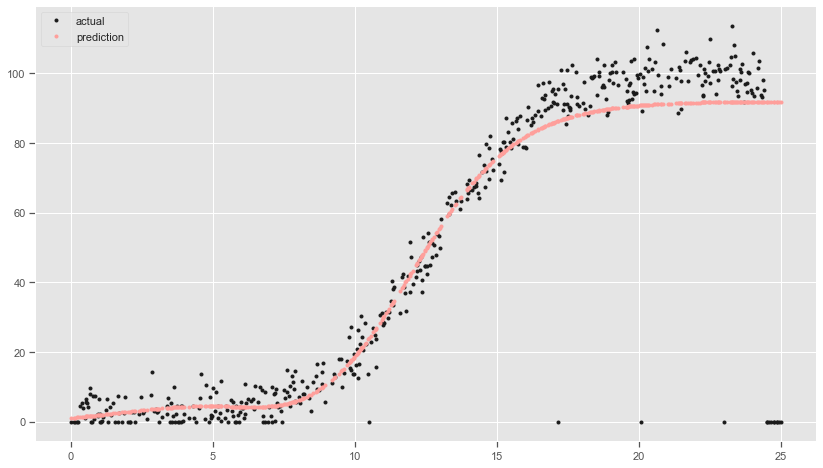

In [154]:
# Now let's see.
plt.plot(df['speed'], df['power'], 'k.',label='actual')
plt.plot(df['speed'], model.predict(df['speed']), 'r.',label='prediction')
plt.legend();

In [155]:
accuracy = model.evaluate(x, y)

16/16 [==============================] - 0s 972us/step - loss: 253.4166 - accuracy: 0.0000e+00


The zero values for power at high levels of speed does seem to be pulling the curve down so maybe I need to take them out. The rest of the data seems to be quite well modelled.
I need to read more into this. Overall it is still impressive that with only a single numerical input for speed you can still get such a close match to what the power values look like.

The loss is still quite high and did not come down much despite playing around with the parameters.
The ideal loss is is zero and the ideal accuracy is 1.0 or 100%.
>The goal is to choose a model configuration and training configuration that achieve the lowest loss and highest accuracy possible for a given dataset
- https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

I need to split the data also into a training and test set.
See https://scikit-learn.org/stable/modules/cross_validation.html
`from sklearn.model_selection import train_test_split` 
`X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.4, random_state=0)`

### Cleaning the dataset
I will move this up to the top of the notebook. It looks like it is necessary as the zero power values when speed is really high is throwing everything out.
So first a refresher on where all the zero values occur. While there is only one zero value for the speed variable, there are 49 zero values for the power variable as shown at the top of the notebook.
I need to see whether there are power values that are zero for some values of speed but not zero for similar values of speed. Any zero values of power that are consistently zero for their speed values might mean that these power values will always be zero, as mentioned earlier this could be due to the turbines being switched off at very high values of speed which might be dangerous.  


In [169]:
df[df['speed']==0]

,speed,power
0,0.0,0.0


In [170]:
df[df['power']==0]

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
15,0.726,0.0
16,0.751,0.0
24,1.026,0.0
26,1.076,0.0
31,1.301,0.0


In [185]:
df[df['speed']>24.449]

,speed,power
490,24.499,0.0
491,24.525,0.0
492,24.575,0.0
493,24.650,0.0
494,24.750,0.0
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


In [191]:
df[df.speed>24.4]

,speed,power
490,24.499,0.0
491,24.525,0.0
492,24.575,0.0
493,24.650,0.0
494,24.750,0.0
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


In [192]:
df.loc[(df.speed>24.4)]

,speed,power
490,24.499,0.0
491,24.525,0.0
492,24.575,0.0
493,24.650,0.0
494,24.750,0.0
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


In [195]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
# https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
df.drop(df.loc[(df.speed>24.4)].index, inplace=True)

In [196]:
df.describe()

,speed,power
count,490.000000,490.000000
mean,12.342347,48.994473
std,7.084113,41.461788
min,0.000000,0.000000
25%,6.162250,5.643750
50%,12.374500,44.094500
75%,18.411750,93.697000
max,24.399000,113.556000


In [197]:
# Train a different model.
model = kr.models.Sequential()
model.add(kr.layers.Dense(60, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error', metrics=['accuracy'])

In [198]:
# Fit the data.
model.fit(df['speed'], df['power'], epochs=500, batch_size=10)

Epoch 1/500
49/49 [==============================] - 0s 876us/step - loss: 4193.7241 - accuracy: 0.0796
Epoch 2/500
49/49 [==============================] - 0s 925us/step - loss: 3960.7180 - accuracy: 0.0163
Epoch 3/500
49/49 [==============================] - 0s 995us/step - loss: 3681.8738 - accuracy: 0.0000e+00
Epoch 4/500
49/49 [==============================] - 0s 952us/step - loss: 3392.4026 - accuracy: 0.0000e+00
Epoch 5/500
49/49 [==============================] - 0s 1ms/step - loss: 3150.2827 - accuracy: 0.0000e+00
Epoch 6/500
49/49 [==============================] - 0s 2ms/step - loss: 2960.7268 - accuracy: 0.0000e+00
Epoch 7/500
49/49 [==============================] - 0s 1ms/step - loss: 2800.0432 - accuracy: 0.0000e+00
Epoch 8/500
49/49 [==============================] - 0s 1ms/step - loss: 2651.2080 - accuracy: 0.0000e+00
Epoch 9/500
49/49 [==============================] - 0s 971us/step - loss: 2517.9097 - accuracy: 0.0000e+00
Epoch 10/500
49/49 [========================

49/49 [==============================] - 0s 919us/step - loss: 192.3063 - accuracy: 0.0490
Epoch 79/500
49/49 [==============================] - 0s 2ms/step - loss: 188.6449 - accuracy: 0.0490
Epoch 80/500
49/49 [==============================] - 0s 1ms/step - loss: 185.2635 - accuracy: 0.0490
Epoch 81/500
49/49 [==============================] - 0s 2ms/step - loss: 182.1978 - accuracy: 0.0490
Epoch 82/500
49/49 [==============================] - 0s 2ms/step - loss: 179.0372 - accuracy: 0.0490
Epoch 83/500
49/49 [==============================] - 0s 2ms/step - loss: 176.2759 - accuracy: 0.0490
Epoch 84/500
49/49 [==============================] - 0s 2ms/step - loss: 173.4639 - accuracy: 0.0510
Epoch 85/500
49/49 [==============================] - 0s 2ms/step - loss: 170.9951 - accuracy: 0.0510
Epoch 86/500
49/49 [==============================] - 0s 3ms/step - loss: 168.5704 - accuracy: 0.0490
Epoch 87/500
49/49 [==============================] - 0s 2ms/step - loss: 166.4058 - accuracy

49/49 [==============================] - 0s 2ms/step - loss: 109.4585 - accuracy: 0.0490
Epoch 158/500
49/49 [==============================] - 0s 2ms/step - loss: 108.9655 - accuracy: 0.0490
Epoch 159/500
49/49 [==============================] - 0s 1ms/step - loss: 108.6333 - accuracy: 0.0490
Epoch 160/500
49/49 [==============================] - 0s 2ms/step - loss: 107.7425 - accuracy: 0.0490
Epoch 161/500
49/49 [==============================] - 0s 1ms/step - loss: 107.0375 - accuracy: 0.0490
Epoch 162/500
49/49 [==============================] - 0s 1ms/step - loss: 106.8270 - accuracy: 0.0490
Epoch 163/500
49/49 [==============================] - 0s 2ms/step - loss: 106.2149 - accuracy: 0.0490
Epoch 164/500
49/49 [==============================] - 0s 2ms/step - loss: 106.1559 - accuracy: 0.0490
Epoch 165/500
49/49 [==============================] - 0s 987us/step - loss: 105.3618 - accuracy: 0.0490
Epoch 166/500
49/49 [==============================] - 0s 1ms/step - loss: 104.9109 -

49/49 [==============================] - 0s 2ms/step - loss: 84.7661 - accuracy: 0.0000e+00
Epoch 236/500
49/49 [==============================] - 0s 2ms/step - loss: 85.0797 - accuracy: 0.0000e+00
Epoch 237/500
49/49 [==============================] - 0s 1ms/step - loss: 84.5480 - accuracy: 0.0000e+00
Epoch 238/500
49/49 [==============================] - 0s 2ms/step - loss: 84.1480 - accuracy: 0.0000e+00
Epoch 239/500
49/49 [==============================] - 0s 931us/step - loss: 84.4696 - accuracy: 0.0000e+00
Epoch 240/500
49/49 [==============================] - 0s 2ms/step - loss: 84.2054 - accuracy: 0.0000e+00
Epoch 241/500
49/49 [==============================] - 0s 2ms/step - loss: 83.9617 - accuracy: 0.0000e+00
Epoch 242/500
49/49 [==============================] - 0s 3ms/step - loss: 83.8641 - accuracy: 0.0000e+00
Epoch 243/500
49/49 [==============================] - 0s 1ms/step - loss: 83.7308 - accuracy: 0.0000e+00
Epoch 244/500
49/49 [==============================] - 0s 

49/49 [==============================] - 0s 3ms/step - loss: 78.5098 - accuracy: 0.0000e+00
Epoch 313/500
49/49 [==============================] - 0s 3ms/step - loss: 78.3436 - accuracy: 0.0000e+00
Epoch 314/500
49/49 [==============================] - 0s 3ms/step - loss: 78.3708 - accuracy: 0.0000e+00
Epoch 315/500
49/49 [==============================] - 0s 3ms/step - loss: 78.2592 - accuracy: 0.0000e+00
Epoch 316/500
49/49 [==============================] - 0s 3ms/step - loss: 78.2703 - accuracy: 0.0000e+00
Epoch 317/500
49/49 [==============================] - 0s 2ms/step - loss: 78.2637 - accuracy: 0.0000e+00
Epoch 318/500
49/49 [==============================] - 0s 1ms/step - loss: 78.1819 - accuracy: 0.0000e+00
Epoch 319/500
49/49 [==============================] - 0s 3ms/step - loss: 78.0883 - accuracy: 0.0000e+00
Epoch 320/500
49/49 [==============================] - 0s 1ms/step - loss: 78.1767 - accuracy: 0.0000e+00
Epoch 321/500
49/49 [==============================] - 0s 2m

49/49 [==============================] - 0s 2ms/step - loss: 76.6981 - accuracy: 0.0000e+00
Epoch 389/500
49/49 [==============================] - 0s 2ms/step - loss: 76.4586 - accuracy: 0.0000e+00
Epoch 390/500
49/49 [==============================] - 0s 2ms/step - loss: 76.2586 - accuracy: 0.0000e+00
Epoch 391/500
49/49 [==============================] - 0s 2ms/step - loss: 76.8472 - accuracy: 0.0000e+00
Epoch 392/500
49/49 [==============================] - 0s 3ms/step - loss: 76.4716 - accuracy: 0.0000e+00
Epoch 393/500
49/49 [==============================] - 0s 3ms/step - loss: 76.4188 - accuracy: 0.0000e+00
Epoch 394/500
49/49 [==============================] - 0s 2ms/step - loss: 76.3949 - accuracy: 0.0000e+00
Epoch 395/500
49/49 [==============================] - 0s 983us/step - loss: 76.4531 - accuracy: 0.0000e+00
Epoch 396/500
49/49 [==============================] - 0s 936us/step - loss: 76.2692 - accuracy: 0.0000e+00
Epoch 397/500
49/49 [==============================] - 0

49/49 [==============================] - 0s 2ms/step - loss: 76.1330 - accuracy: 0.0000e+00
Epoch 466/500
49/49 [==============================] - 0s 2ms/step - loss: 75.6647 - accuracy: 0.0000e+00
Epoch 467/500
49/49 [==============================] - 0s 2ms/step - loss: 75.7770 - accuracy: 0.0000e+00
Epoch 468/500
49/49 [==============================] - 0s 1ms/step - loss: 75.7830 - accuracy: 0.0000e+00
Epoch 469/500
49/49 [==============================] - 0s 2ms/step - loss: 75.7141 - accuracy: 0.0000e+00
Epoch 470/500
49/49 [==============================] - 0s 2ms/step - loss: 75.5091 - accuracy: 0.0000e+00
Epoch 471/500
49/49 [==============================] - 0s 2ms/step - loss: 75.7220 - accuracy: 0.0000e+00
Epoch 472/500
49/49 [==============================] - 0s 1ms/step - loss: 75.5078 - accuracy: 0.0000e+00
Epoch 473/500
49/49 [==============================] - 0s 2ms/step - loss: 75.3850 - accuracy: 0.0000e+00
Epoch 474/500
49/49 [==============================] - 0s 1m

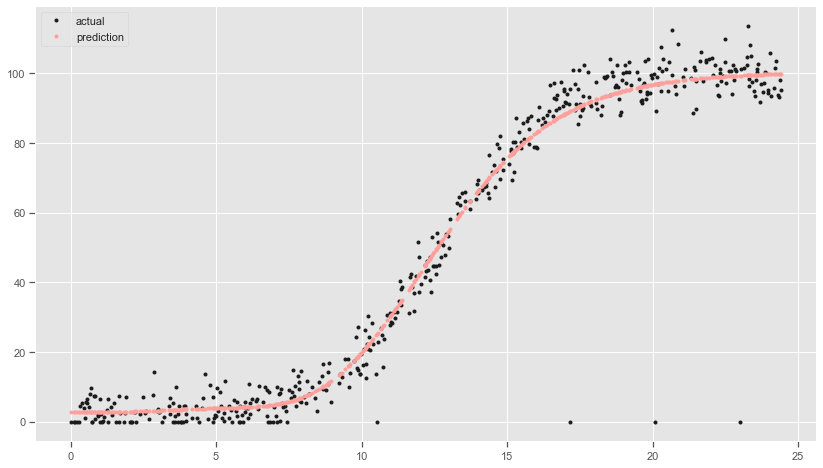

In [199]:
# Now let's see.
plt.plot(df['speed'], df['power'], 'k.',label='actual')
plt.plot(df['speed'], model.predict(df['speed']), 'r.',label='prediction')
plt.legend();

The cost has dropped quite a bit and the plot definitely looks better. I still have not split the data and the cleaned dataset has not been transformed but it looks like I'm on the right track here.
This was just a rough data cleaning but it does seem important in this case to drop the points where speed is over 24.4 as power is always zero then so can be predicted as zero. I do need to look again at the smaller values of speed where power is zero.

https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0
Here I am reading through the article referenced, making notes and some paraphrasing. I will reference properly later.

An artificial neuron calculates a weighted sum of its input, adds a bias and then decides whether it should be fired or not. $ Y = \sum{(\text{weight} * \text{input})} + \text{bias}$
The value of Y can be anything from -infinity to + infinity. The neuron does not really know the bounds of the value. So how do we decide whether the neuron should fire or not? This is where the activation functions come in. The activation function will check the Y value produced by the neuron and decide whether outside connections should consider this neuron as activated (fired) or not.

Consider a threshold based activation function. If the value of Y is above a certain value then it could declare it as activated, otherwise not. In this case the output is 1 (activated) when the value is greater than than the threshold and 0 otherwise. This is a step function. There are drawbacks to using this method as an activation function for neural networks though when the response is not a binary yes or no.

A linear activation function A = cx is a straight line function where activation is proportional to input ( which is the weighted sum from neuron ). In this way it will give a range of activations rather than just binary activations. We can connect some neurons and if more than one fire then we could take the max and decide based on that.

The derivative w.r.x is c which means that the gradient has no relationship with X. The descent is going to be on a constant gradient. If there is an error in prediction the changes made by back propagation is constant and not depending on the change in input delta(x).
Another problem concerns the connected layers where each layer is activated by a linear function. 
That activation in turn goes into the next level as input and the second layer calculates weighted sum on that input and it in turn, fires based on another linear activation function.
No matter how many layers we have, if all are linear in nature, the final activation function of last layer is nothing but just a linear function of the input of first layer. Therefore two or more layers can be replaced by a single layer. The whole network then is equivalent to  a single layer with linear activation.

Thw sigmoid function is smooth and looks somewhat like a step function. It is nonlinear in nature and therefore combinations of layers are also non-linear which means that layers can be stacked. It will also give non binary activations unlike the step function. It has a smooth gradient.

Between X values -2 to 2, the Y values are very steep.This means that any small changes in the values of X in that region will cause values of Y to change significantly.This means this function has a tendency to bring the Y values to either end of the curve.
It tends to bring the activations to either side of the curve making clear distinctions on prediction. Another advantage over linear function is that the output of the activation function is always going to be in range (0,1) compared to (-inf, inf) of linear function and therefore the activations are bound in a range. 
Sigmoid functions are one of the most widely used activation functions today. The problems with them is that towards either end of the sigmoid function, the Y values tend to respond very less to changes in X. This means that the gradient at that region is going to be small. It gives rise to a problem of “vanishing gradients”. When the activations reach near the “near-horizontal” part of the curve on either sides, the gradient is small or has vanished ( cannot make significant change because of the extremely small value ). The network refuses to learn further or is drastically slow ( depending on use case and until gradient /computation gets hit by floating point value limits ). There are ways to work around this problem and sigmoid is still very popular in classification problems.
The article also looked at the Tanh activation functions which is a scaled sigmoid function and the ReLu function which gives an output x if x is positive and 0 otherwise. These are both non-linear functions.

The article finishes by suggesting how to choose the correct activation function. 
When you know the function you are trying to approximate has certain characteristics, you can choose an activation function which will approximate the function faster leading to faster training process. For example, a sigmoid works well for a classifier 

https://www.computing.dcu.ie/~humphrys/Notes/Neural/sigmoid.html
https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

### End